In [15]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sn

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [16]:
data_all = "Output/2019_2020_mixed_beverage"
df_all = pd.read_csv(data_all, encoding="utf-8")
file_path = "Output/census_data.csv"
censusdf = pd.read_csv(file_path, encoding="utf-8")

In [17]:
censusdf.rename(columns={'Zipcode' : 'location_zip'},inplace=True)
censusdf

,location_zip,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,1832,22121.0,38.5,57833.0,29014.0,2412.0,10.903666
1,1833,8295.0,42.4,107775.0,43297.0,191.0,2.302592
2,1834,6675.0,46.1,97463.0,40222.0,146.0,2.187266
3,1835,13527.0,37.1,72228.0,31429.0,1153.0,8.523693
4,1840,4547.0,36.8,18261.0,14758.0,1798.0,39.542556
...,...,...,...,...,...,...,...
33115,99923,81.0,64.3,21944.0,17225.0,4.0,4.938272
33116,99925,668.0,46.4,38125.0,25094.0,124.0,18.562874
33117,99926,1630.0,31.4,50052.0,22850.0,202.0,12.392638
33118,99927,111.0,59.4,19000.0,21157.0,39.0,35.135135


In [18]:
#efficient way to extract year from string format date
df_all['year'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).year
df_all['month'] = pd.DatetimeIndex(df_all['obligation_end_date_yyyymmdd']).month
city_mask = (df_all.location_city == "HOUSTON")|(df_all.location_city == "DALLAS")|(df_all.location_city == "FORT WORTH")|(df_all.location_city == "SAN ANTONIO")|(df_all.location_city == "AUSTIN")
dfcities = df_all[city_mask]
dfcities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44006 entries, 3 to 119998
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   taxpayer_number                      44006 non-null  int64  
 1   taxpayer_name                        44006 non-null  object 
 2   taxpayer_address                     44006 non-null  object 
 3   taxpayer_city                        44006 non-null  object 
 4   taxpayer_state                       43992 non-null  object 
 5   taxpayer_zip                         43992 non-null  float64
 6   taxpayer_county                      44006 non-null  int64  
 7   location_number                      44006 non-null  int64  
 8   location_name                        44006 non-null  object 
 9   location_address                     44006 non-null  object 
 10  location_city                        44006 non-null  object 
 11  location_state             

In [19]:
mask_2019 = dfcities.year == 2019
df_2019 = dfcities[mask_2019]
zip_sales_2019 = pd.DataFrame(df_2019.groupby('location_zip')['total_receipts'].sum()).reset_index()
zip_sales_2019.head()

,location_zip,total_receipts
0,75201,50241090
1,75202,13982160
2,75203,713058
3,75204,15065199
4,75205,7626916


In [36]:
regres_2019 = pd.merge(zip_sales_2019,censusdf,on="location_zip",how="left")
regres_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location_zip       274 non-null    int64  
 1   total_receipts     274 non-null    int64  
 2   Population         272 non-null    float64
 3   Median Age         272 non-null    float64
 4   Household Income   272 non-null    float64
 5   Per Capita Income  272 non-null    float64
 6   Poverty Count      272 non-null    float64
 7   Poverty Rate       271 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.3 KB


In [37]:
clean_regress_2019 = regres_2019.dropna(how='any')
clean_regress_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 0 to 273
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location_zip       271 non-null    int64  
 1   total_receipts     271 non-null    int64  
 2   Population         271 non-null    float64
 3   Median Age         271 non-null    float64
 4   Household Income   271 non-null    float64
 5   Per Capita Income  271 non-null    float64
 6   Poverty Count      271 non-null    float64
 7   Poverty Rate       271 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 19.1 KB


In [58]:
clean_regress_2019.corr()['total_receipts'].reset_index()

,index,total_receipts
0,location_zip,-0.005664
1,total_receipts,1.000000
2,Population,-0.141076
3,Median Age,0.114254
4,Household Income,0.029733
5,Per Capita Income,0.389745
6,Poverty Count,-0.166662
7,Poverty Rate,-0.094807


The r-squared is: 0.1519010982688524


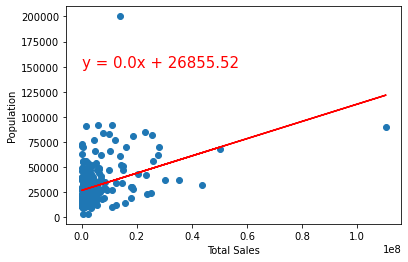

In [50]:
# Print out the r-squared value along with the plot.
x_values = clean_regress_2019['total_receipts']
y_values = clean_regress_2019['Per Capita Income']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,150000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Population')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02777616759410089


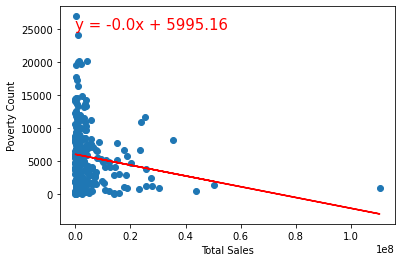

In [57]:
# Print out the r-squared value along with the plot.
x_values = clean_regress_2019['total_receipts']
y_values = clean_regress_2019['Poverty Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.6,25000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Poverty Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01990232613096347


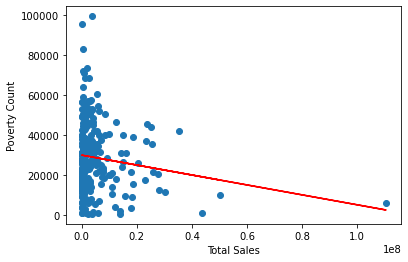

In [59]:
# Print out the r-squared value along with the plot.
x_values = clean_regress_2019['total_receipts']
y_values = clean_regress_2019['Population']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(.6,25000),fontsize=15,color="red")
plt.xlabel('Total Sales')
plt.ylabel('Poverty Count')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# times = zip_sales_2019.total_receipts
fig1, ax1 = plt.subplots()
ax1.set_title('2019 Total Sales by Zipcode')
ax1.set_ylabel('Total Sales')
ax1.boxplot(zip_sales_2019.total_receipts)
plt.show()